In [4]:
from google.colab import files
uploaded = files.upload()

Saving Vital_Mortality_Cty.csv to Vital_Mortality_Cty.csv
Saving air_quality_index_days.csv to air_quality_index_days.csv
Saving citywide_over_time.csv to citywide_over_time.csv
Saving planning_district.csv to planning_district.csv
Saving racial_disparity.csv to racial_disparity.csv
Saving health_of_the_city.csv to health_of_the_city.csv
Saving Health_Centers.csv to Health_Centers.csv
Saving Vital_Population_Cty.csv to Vital_Population_Cty.csv
Saving Vital_Population_CT.csv to Vital_Population_CT.csv


In [10]:
# Import libraries
import pandas as pd
import altair as alt
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

# Loading datasets into dataframes
health_centers_df = pd.read_csv('/content/Health_Centers.csv')
population_1_df = pd.read_csv('/content/Vital_Population_Cty.csv')
population_2_df = pd.read_csv('/content/Vital_Population_CT.csv')
health_of_city_df = pd.read_csv('/content/health_of_the_city.csv')
citywide_overtime_df = pd.read_csv('/content/citywide_over_time.csv')
planning_district_df = pd.read_csv('/content/planning_district.csv')
racial_disparity_df = pd.read_csv('/content/racial_disparity.csv')
mortality_df = pd.read_csv('/content/Vital_Mortality_Cty.csv')

# Checking if files read correctly
health_centers_df.head()

,OBJECTID,NAME,ORGANIZATION,ZIP,PHONE,WEBSITE,DENTAL_PHONE,FULL_ADDRESS
0,1,Maria de los Santos Health Center,DVCH,19133,215-291-2500,http://dvch.org/locations/maria-de-los-santos-...,215-291-2509,401 West Allegheny Ave
1,2,Maria de los Santos Women's Health Center,DVCH,19133,215-291-2500,http://dvch.org/locations/maria-de-los-santos-...,NaN,"400 West Allegheny Ave, Unit B-5"
2,3,Parkview OB/Gyn & Podiatry Services,DVCH,19124,215-537-7695,http://dvch.org/locations/parkview-health-center/,NaN,"841 E. Hunting Park Avenue, 2nd Floor"
3,4,Fairmount Primary Care Center at Girard Medica...,DVCH,19122,215-827-8010,http://dvch.org/locations/fairmount-primary-ca...,NaN,801 W. Girard Ave
4,5,K&A,Esperanza,19134,215-302-3600,http://esperanzahealth.com/wp/,215-302-3156,3156 Kensington Ave


In [11]:
# Plot number of health centers per organization
chart = alt.Chart(health_centers_df).mark_bar(color='skyblue').encode(
    x=alt.X('ORGANIZATION:N', title='Organization'),
    y=alt.Y('count():Q', title='Number of Health Centers')
).properties(
    title='Number of Health Centers per Organization',
    width=600,
    height=400
).configure_axis(
    labelAngle=-45
).configure_title(
    fontSize=16
)

chart

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

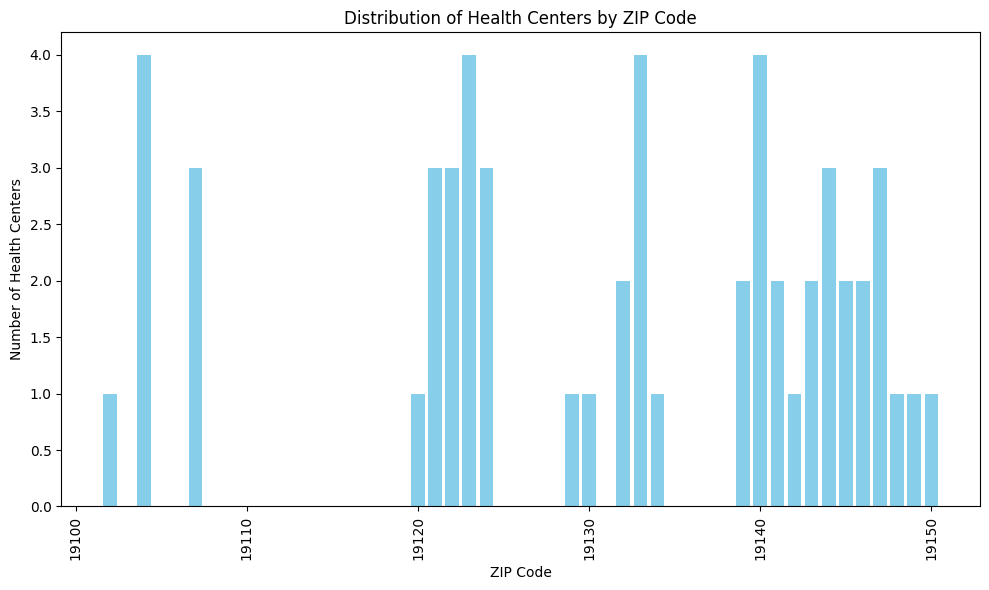

In [12]:
# Group health centers by ZIP code to count how many centers are in each area
health_centers_by_zip = health_centers_df.groupby('ZIP').size().reset_index(name='Health_Center_Count')

# Plot distribution of health centers by ZIP code
plt.figure(figsize=(10,6))
plt.bar(health_centers_by_zip['ZIP'], health_centers_by_zip['Health_Center_Count'], color='skyblue')
plt.xlabel('ZIP Code')
plt.ylabel('Number of Health Centers')
plt.title('Distribution of Health Centers by ZIP Code')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [27]:
population_by_race = racial_disparity_df
print(racial_disparity_df.columns)
filtered_population_by_race = population_by_race[population_by_race['Category'] != 'All races/ethnicities']

# Plot racial/ethnic distribution
plt.figure(figsize=(10,6))
plt.bar(filtered_population_by_race['Category'], filtered_population_by_race['COUNT'], color='skyblue')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Population Count')
plt.title('Population Distribution by Race/Ethnicity')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Index(['Category', 'Indicator', 'subTitle', 'dataType', 'dataSource',
       'dataSourceYear', 'description', 'chartComment', 'Note',
       'Total population', 'Black, non-Hispanic', 'White, non-Hispanic',
       'Hispanic', 'Asian, non-Hispanic'],
      dtype='object')


KeyError: 'COUNT'

<Figure size 1000x600 with 0 Axes>

In [24]:
# Calculate the total population and the proportion by ethnicity
total_population = filtered_population_by_race['COUNT_'].sum()

# Proportion column to see the percentage of total population by ethnicity
filtered_population_by_race['Proportion'] = filtered_population_by_race['COUNT_'] / total_population * 100


filtered_population_by_race[['RACE_ETHNICITY', 'COUNT_', 'Proportion']]

KeyError: 'COUNT_'

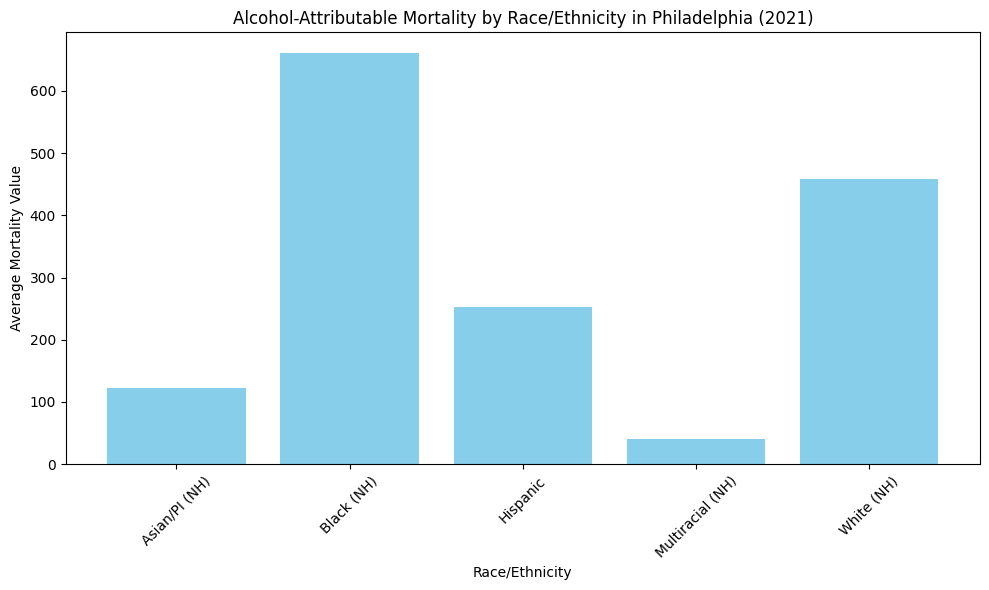

In [19]:
# Filter out the row that includes "All races/ethnicities" and check for any negative values
filtered_mortality_df = mortality_df[mortality_df['RACE_ETHNICITY'] != 'All races/ethnicities']

# Group data by race/ethnicity and calculate mean of the metric values to compare mortality rates
mortality_by_race = mortality_df.groupby('RACE_ETHNICITY')['METRIC_VALUE'].mean().reset_index()

# Remove rows with placeholder values (negative values) from the dataset
cleaned_mortality_df = filtered_mortality_df[filtered_mortality_df['METRIC_VALUE'] >= 0]

# Group the cleaned data by race/ethnicity and calculating the mean of the metric values to compare mortality rates
mortality_by_race_cleaned = cleaned_mortality_df.groupby('RACE_ETHNICITY')['METRIC_VALUE'].mean().reset_index()

# Visualize the cleaned mortality rates by race/ethnicity
plt.figure(figsize=(10, 6))
plt.bar(mortality_by_race_cleaned['RACE_ETHNICITY'], mortality_by_race_cleaned['METRIC_VALUE'], color='skyblue')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Mortality Value')
plt.title('Alcohol-Attributable Mortality by Race/Ethnicity in Philadelphia (2021)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-20-051bfe1c58a4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_mortality_by_age['NEW_AGE_CATEGORY'] = filtered_mortality_by_age['AGE_CATEGORY'].replace({


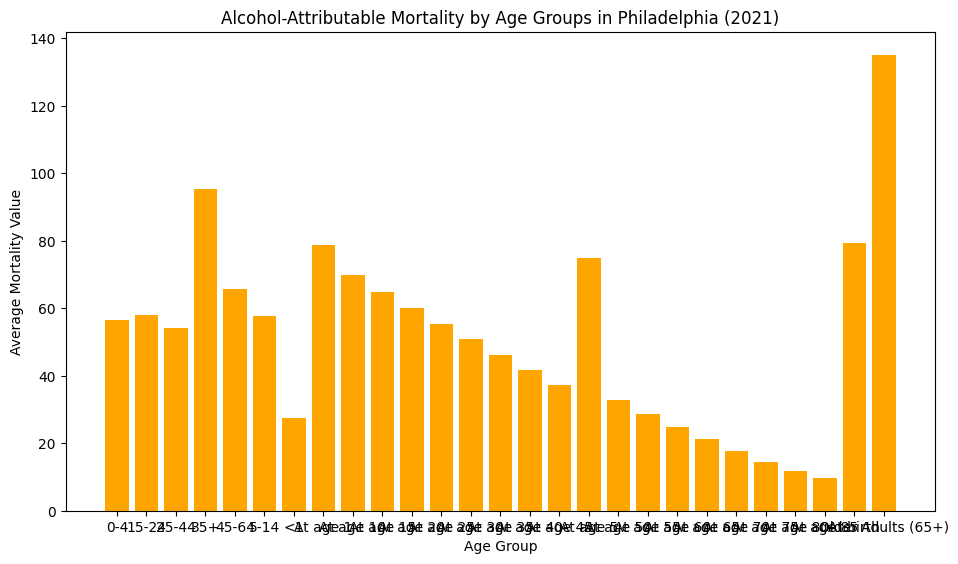

In [20]:
filtered_mortality_by_age = cleaned_mortality_df[cleaned_mortality_df['AGE_CATEGORY'] != 'All ages']

new_age_bins_final = {
    'Children (0-14)': ['0-14'],  # Merging into a single group 0-14
    'Teens (15-18)': ['15-18'],  # One group for teens
    'Young Adults (18-25)': ['18-25'],  # One group for young adults
    'Adults (25-40)': ['25-40'],  # One group for adults
    'Middle-Aged Adults (40-65)': ['40-65'],  # One group for middle-aged adults
    'Older Adults (65+)': ['65+']  # One group for older adults
}

# Assign new age groups to a column
filtered_mortality_by_age['NEW_AGE_CATEGORY'] = filtered_mortality_by_age['AGE_CATEGORY'].replace({
    age: group for group, ages in new_age_bins_final.items() for age in ages
})

# Group by the new age categories and calculate the mean mortality values
mortality_by_new_age_final = filtered_mortality_by_age.groupby('NEW_AGE_CATEGORY')['METRIC_VALUE'].mean().reset_index()

# Sort the age categories for better plotting
mortality_by_new_age_final = mortality_by_new_age_final.sort_values(by='NEW_AGE_CATEGORY')

# Visualize the mortality rates by the newly defined age groups
plt.figure(figsize=(10, 6))
plt.bar(mortality_by_new_age_final['NEW_AGE_CATEGORY'], mortality_by_new_age_final['METRIC_VALUE'], color='orange')
plt.xlabel('Age Group')
plt.ylabel('Average Mortality Value')
plt.title('Alcohol-Attributable Mortality by Age Groups in Philadelphia (2021)')
plt.xticks(rotation=0, ha='center')
plt.tight_layout(pad=2)
plt.show()


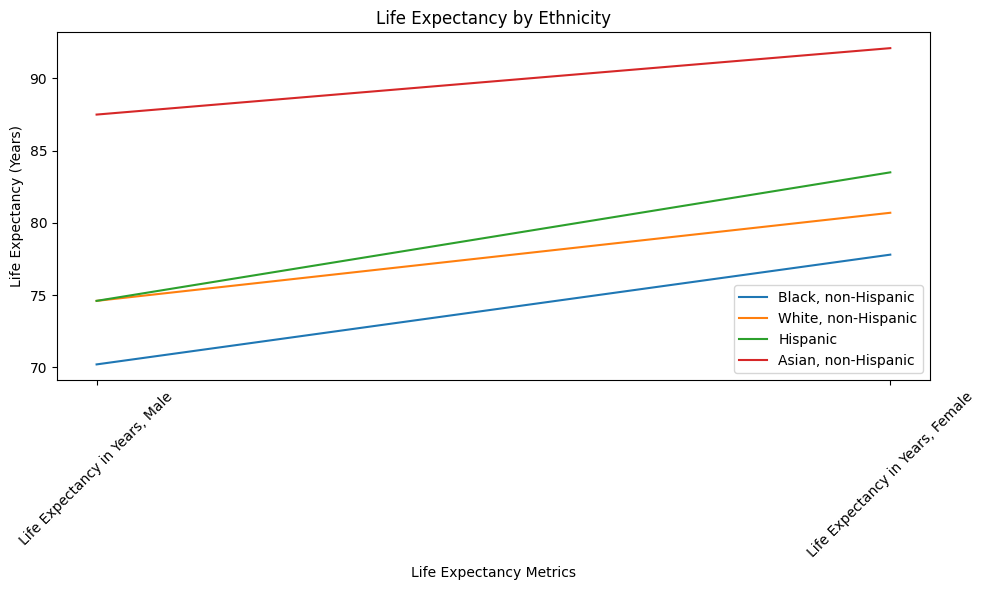

In [75]:
life_expectancy_df = racial_disparity_df[racial_disparity_df['Indicator'].str.contains('Life Expectancy')]

# Visualize Life Expectancy by Ethnicity
plt.figure(figsize=(10, 6))
for ethnicity in ['Black, non-Hispanic', 'White, non-Hispanic', 'Hispanic', 'Asian, non-Hispanic']:
    plt.plot(life_expectancy_df['Indicator'], life_expectancy_df[ethnicity], label=ethnicity)

plt.title('Life Expectancy by Ethnicity')
plt.xlabel('Life Expectancy Metrics')
plt.ylabel('Life Expectancy (Years)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


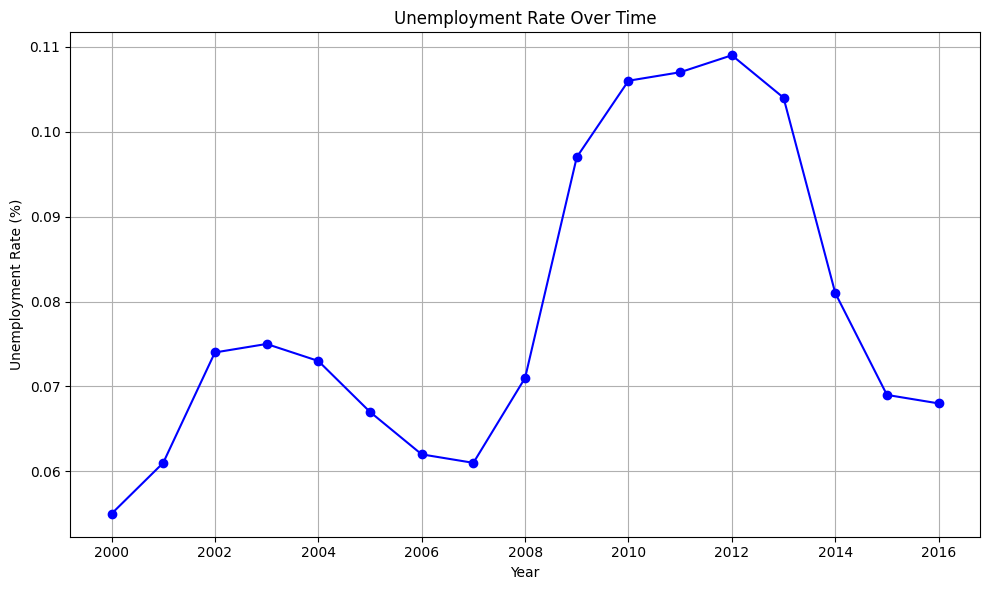

In [82]:
unemployment_df = citywide_overtime_df[citywide_overtime_df['Indicator'].str.contains('Unemployment')]

years = [str(year) for year in range(2000, 2017)]

# Reshape data for plotting unemployment trends
unemployment_melted = unemployment_df.melt(id_vars=['Indicator'], value_vars=years, var_name='Year', value_name='Rate')
unemployment_melted['Year'] = pd.to_numeric(unemployment_melted['Year'])

# Plotting the unemployment rate over time
plt.figure(figsize=(10, 6))
plt.plot(unemployment_melted['Year'], unemployment_melted['Rate'], label='Unemployment Rate', marker='o', color='blue')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

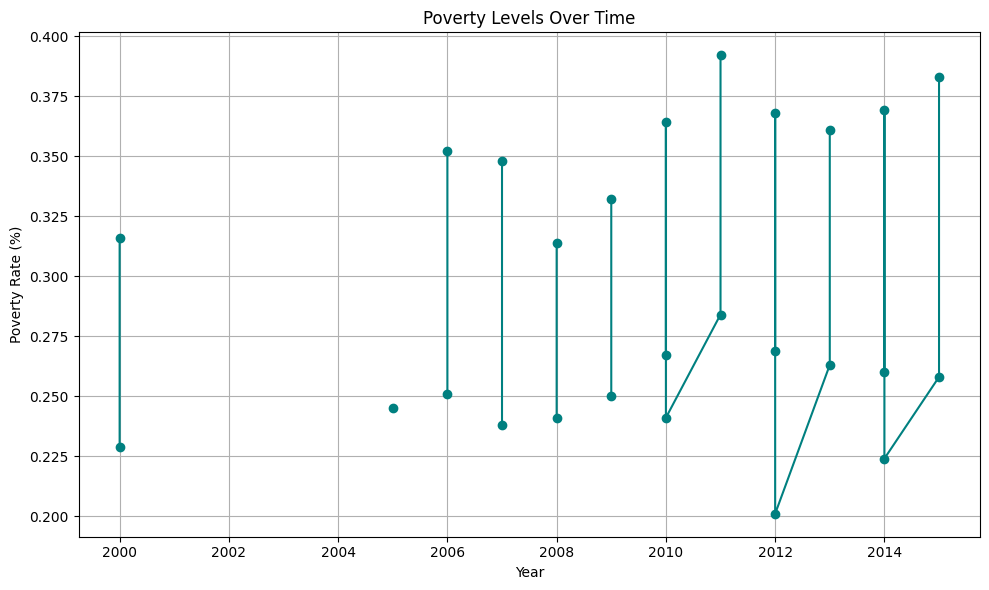

In [84]:
poverty_df = citywide_overtime_df[citywide_overtime_df['Indicator'].str.contains('Poverty')]

years = [str(year) for year in range(2000, 2017)]

# Reshape the data for plotting poverty trends
poverty_melted = poverty_df.melt(id_vars=['Indicator'], value_vars=years, var_name='Year', value_name='Rate')
poverty_melted['Year'] = pd.to_numeric(poverty_melted['Year'])

# Plot poverty levels over time
plt.figure(figsize=(10, 6))
plt.plot(poverty_melted['Year'], poverty_melted['Rate'], label='Poverty Rate', marker='o', color='teal')
plt.title('Poverty Levels Over Time')
plt.xlabel('Year')
plt.ylabel('Poverty Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [87]:
from scipy import stats

# From pre-recession (2000-2007) and post-recession (2008-2016) periods to see if change in metrics is significant

# Splitting data into pre- and post-recession for unemployment and poverty rates
pre_recession_years = unemployment_melted[unemployment_melted['Year'] <= 2007]
post_recession_years = unemployment_melted[unemployment_melted['Year'] > 2007]

# Conduct t-tests to compare the means of pre- and post-recession periods
unemployment_ttest = stats.ttest_ind(pre_recession_years['Rate'], post_recession_years['Rate'], equal_var=False)

unemployment_ttest

TtestResult(statistic=-3.747062214031705, pvalue=0.003251717203575377, df=10.949603151117689)

The t-test statistic is $-3.75$, and the p-value is $0.003$. This indicates that there is a statistically significant difference in unemployment rates between the pre-recession (2000-2007) and post-recession (2008-2016) periods. The unemployment rate significantly increased after the recession.

In [92]:
unemployment_df = citywide_overtime_df[citywide_overtime_df['Indicator'].str.contains('Unemployment')]
poverty_df = citywide_overtime_df[citywide_overtime_df['Indicator'].str.contains('Poverty')]

years = [str(year) for year in range(2000, 2017)]

unemployment_melted = unemployment_df.melt(id_vars=['Indicator'], value_vars=years, var_name='Year', value_name='Rate')
unemployment_melted['Year'] = pd.to_numeric(unemployment_melted['Year'])

# Split data into pre- and post-recession for unemployment and poverty rates
pre_recession_unemployment = unemployment_melted[unemployment_melted['Year'] <= 2007]['Rate']
post_recession_unemployment = unemployment_melted[unemployment_melted['Year'] > 2007]['Rate']

# Run one-way ANOVA on unemployment rates
unemployment_anova = stats.f_oneway(pre_recession_unemployment, post_recession_unemployment)

# Output ANOVA test results for unemployment
unemployment_anova

F_onewayResult(statistic=12.854978901431817, pvalue=0.00270555619532563)

The F-statistic is $12.85$, and the p-value is $0.0027$, indicating that there is a statistically significant difference in unemployment rates between the pre-recession (2000-2007) and post-recession (2008-2016) periods. This supports the hypothesis that unemployment rates changed significantly after the recession.

<ipython-input-23-62fb42f2794a>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


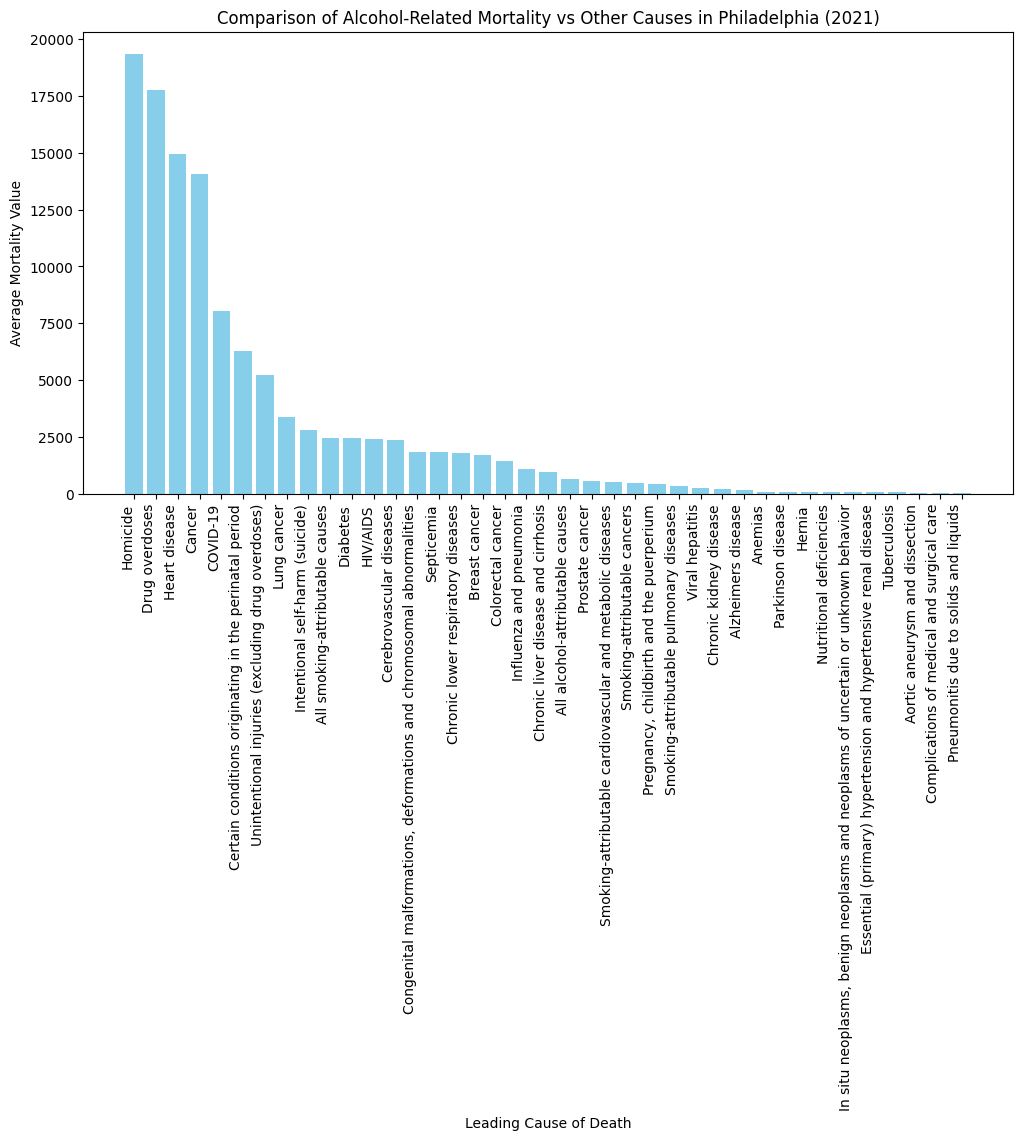

In [23]:
# Grouping by cause of death again to calculate mean mortality values by cause for comparison
mortality_by_cause = cleaned_mortality_df[cleaned_mortality_df['LEADING_CAUSE_DEATH'] != 'All causes']

# Sorting by mortality values for better visualization
mortality_by_cause_sorted = mortality_by_cause.sort_values(by='METRIC_VALUE', ascending=False)

# Visualize the comparison between alcohol-related mortality and other causes
plt.figure(figsize=(12, 6))
plt.bar(mortality_by_cause_sorted['LEADING_CAUSE_DEATH'], mortality_by_cause_sorted['METRIC_VALUE'], color='skyblue')
plt.xlabel('Leading Cause of Death')
plt.ylabel('Average Mortality Value')
plt.title('Comparison of Alcohol-Related Mortality vs Other Causes in Philadelphia (2021)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()